In [24]:
import pandas as pd
import glob

# specify the folder containing the CSV files
folder_path = '/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/ChunkedECEP/csv_outputs/'

# get a list of all CSV files in the folder
csv_files = glob.glob(folder_path + "/*.csv")

# create an empty list to hold the dataframes
dfs = []

# iterate over the list of CSV files and read each one into a dataframe
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# concatenate all the dataframes into one
merged_df = pd.concat(dfs, ignore_index=True)

# save the merged dataframe to a new CSV file
merged_df.to_csv('/Users/bsg25/Library/CloudStorage/OneDrive-YaleUniversity/TrochAIc/ChunkedECEP/csv_outputs/merged_output.csv', index=False)

/var/folders/q0/7d7kf7n56nb1dvl9z19dkhnmw0xmy9/T/ipykernel_74878/673424248.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_df = pd.concat(dfs, ignore_index=True)


In [29]:
# Remove rows where length of meter > 13
bigdf = merged_df.drop_duplicates()
bigdf = bigdf[bigdf['meter'].str.len() <= 13]
bigdf


,line_txt,txt,meter,stress,score,num_viols,ambig
0,And work up every piece with every grace;,and WORK up E very PIECE with E very GRACE,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
1,"In airs and attitudes be wondrous wise,",in AIRS and AT ti TUDES be WON drous WISE,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
2,"And know the arts to please, or to surprise;",and KNOW the ARTS to PLEASE or TO sur PRISE,-+-+-+-+-+,-+-+-+---+,1.0,1.0,1.0
3,"In music's softest sound consume the day,",in MU sic's SOF test SOUND con SUME the DAY,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
4,Sounds that would melt the warrior's soul away:,SOUNDS that.would MELT the WAR rior's SOUL a WAY,+--+-+-+-+,+--+-+-+-+,0.0,0.0,1.0
...,...,...,...,...,...,...,...
191356,With crowds of black misfortunes placed between;,with CROWDS of BLACK mis FOR tunes PLACED be T...,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,1.0
191357,"And fears, and jealousies, and dark despair.",and FEARS and JEA lou SIES and DARK des PAIR,-+-+-+-+-+,-+-+---+-+,1.0,1.0,3.0
191358,And since that day ( the wretched world must own,and SINCE that DAY the WRETC hed WORLD must OWN,-+-+-+-+-+,-+-+-+-+-+,0.0,0.0,2.0
191359,These mournful truths by sad experience known ),these MOURN ful TRUTHS by SAD ex PE rien.ce KNOWN,-+-+-+-+--+,-+-+-+-+--+,1.0,1.0,2.0


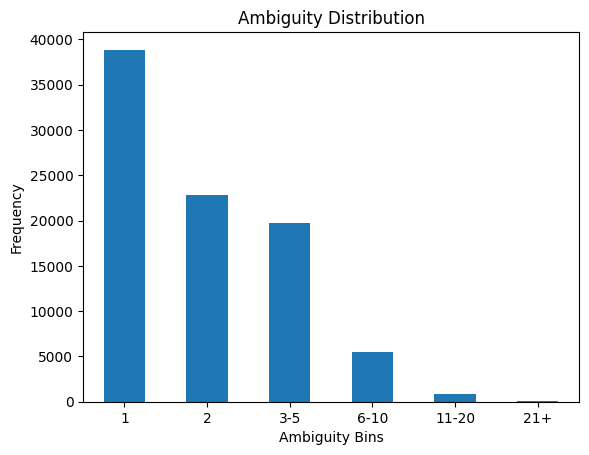

In [26]:
import matplotlib.pyplot as plt
# Define bins and labels
bins = [1, 2, 3, 6, 11, 21, float('inf')]
labels = ['1', '2', '3-5', '6-10', '11-20', '21+']
# Bin the 'ambig' column
bigdf['ambig_binned'] = pd.cut(bigdf['ambig'], bins=bins, labels=labels, right=False)
# Plotting the binned ambiguity
bigdf['ambig_binned'].value_counts().sort_index().plot(kind='bar')
plt.title('Ambiguity Distribution')
plt.xlabel('Ambiguity Bins')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

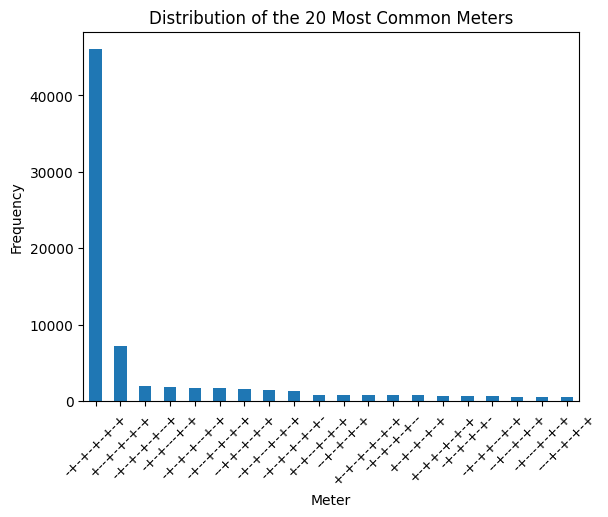

In [27]:
import matplotlib.pyplot as plt
# Get the distribution of the 20 most common meters
meter_distribution = bigdf['meter'].value_counts().head(20)
# Create a DataFrame for the meter distribution
bigdf = pd.DataFrame(meter_distribution).reset_index()
bigdf.columns = ['meter', 'count']
# Plotting the distribution of the 20 most common meters
bigdf.plot(kind='bar', x='meter', y='count', legend=False)
plt.title('Distribution of the 20 Most Common Meters')
plt.xlabel('Meter')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

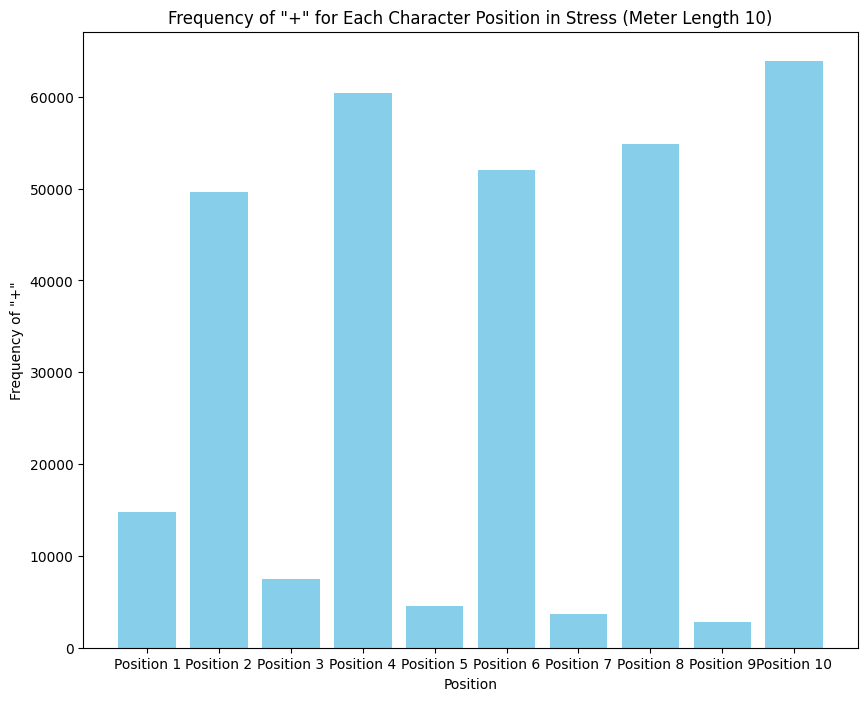

In [38]:
import matplotlib.pyplot as plt
# Filter rows where meter length is 10
decadf = bigdf[bigdf['meter'].str.len() == 10]
# Calculate frequency of '+' for each character position in 'stress'
frequency = {f'Position {i+1}': decadf['stress'].str[i].value_counts().get('+', 0) for i in range(10)}
# Convert the result to a DataFrame
decadf = pd.DataFrame(list(frequency.items()), columns=['Position', 'Frequency'])
# Plot the frequency of '+' for each character position
plt.figure(figsize=(10, 8))
plt.bar(decadf['Position'], decadf['Frequency'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Frequency of "+"')
plt.title('Frequency of "+" for Each Character Position in Stress (Meter Length 10)')
plt.show()

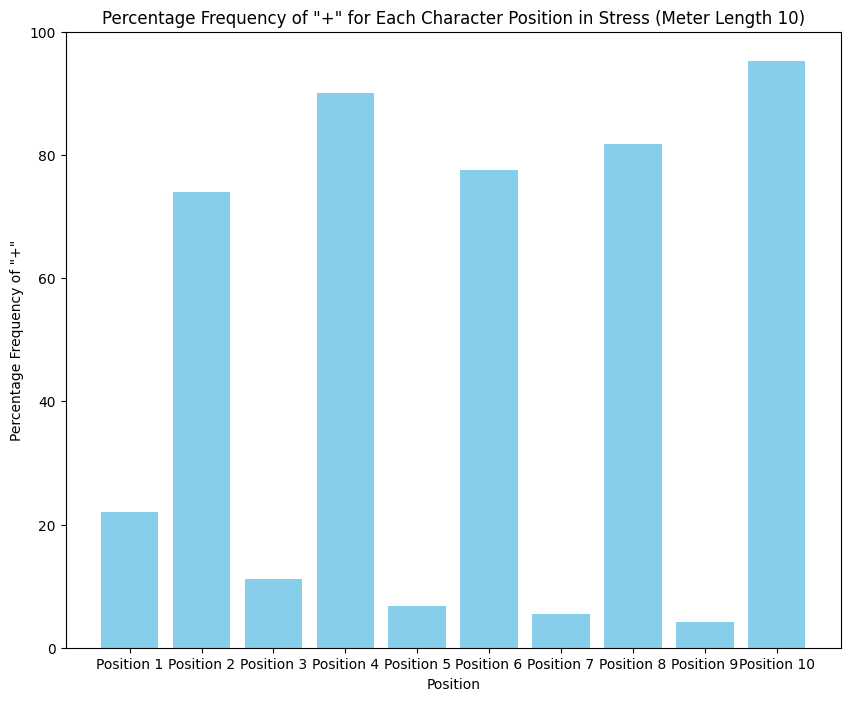

In [39]:
import matplotlib.pyplot as plt
# Filter rows where meter length is 10
decadf = bigdf[bigdf['meter'].str.len() == 10]
# Calculate percentage frequency of '+' for each character position in 'stress'
frequency = {f'Position {i+1}': (decadf['stress'].str[i].value_counts().get('+', 0) / len(decadf)) * 100 for i in range(10)}
# Convert the result to a DataFrame
decadf = pd.DataFrame(list(frequency.items()), columns=['Position', 'Percentage Frequency'])
# Plot the percentage frequency of '+' for each character position
plt.figure(figsize=(10, 8))
plt.bar(decadf['Position'], decadf['Percentage Frequency'], color='skyblue')
plt.xlabel('Position')
plt.ylabel('Percentage Frequency of "+"')
plt.title('Percentage Frequency of "+" for Each Character Position in Stress (Meter Length 10)')
plt.show()

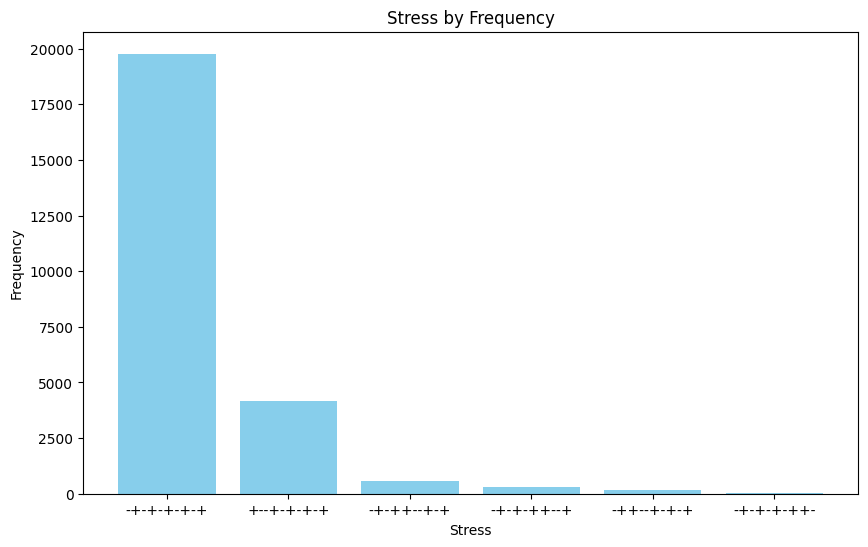

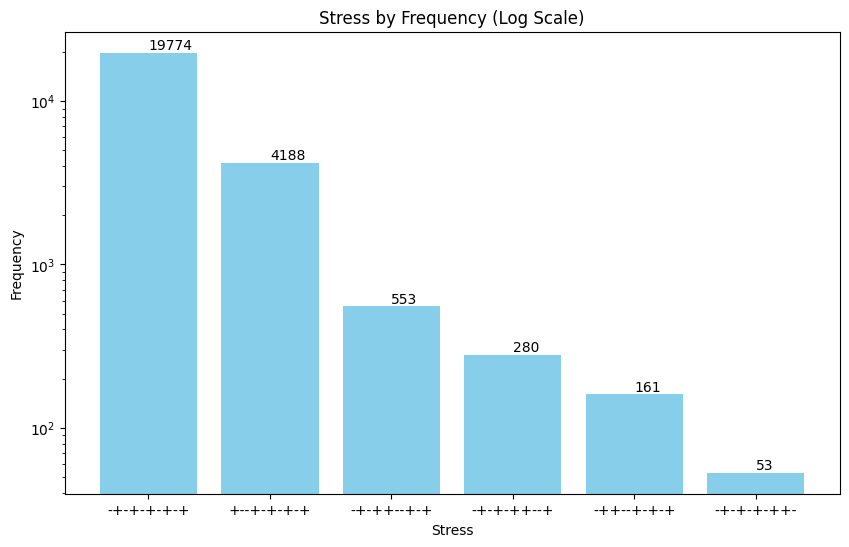

In [36]:
stress_patterns = ['-+-+-+-+-+', '+--+-+-+-+', '-++--+-+-+', '-+-++--+-+', '-+-+-++--+', '-+-+-+-++-']
trocheedf = bigdf[bigdf['stress'].isin(stress_patterns)]

import matplotlib.pyplot as plt
# Group by 'stress' and count frequencies
stress_frequency = trocheedf['stress'].value_counts().reset_index()
stress_frequency.columns = ['stress', 'frequency']
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(stress_frequency['stress'], stress_frequency['frequency'], color='skyblue')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Stress by Frequency')
plt.show()

import matplotlib.pyplot as plt
# Group by 'stress' and count frequencies
stress_frequency = trocheedf['stress'].value_counts().reset_index()
stress_frequency.columns = ['stress', 'frequency']
# Plotting the graph with logarithmic scale
plt.figure(figsize=(10, 6))
bars = plt.bar(stress_frequency['stress'], stress_frequency['frequency'], color='skyblue')
plt.yscale('log')
plt.xlabel('Stress')
plt.ylabel('Frequency')
plt.title('Stress by Frequency (Log Scale)')
# Label each bar with total count
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 
plt.show()